In [1]:

import pandas as pd
import numpy as np
import os

In [2]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
home_directory = os.path.expanduser("~")
omnetpp_directory = os.path.join(home_directory, "omnetpp-6.0.2")
vec_directory = os.path.join(omnetpp_directory, "samples", "thesis", "results")

In [3]:
dispatchingAlgos = ["DLAGO-TP", "D2FO","GreedyPartition", "RandomPartition"]
schedulingAlgos = ["EDF", "FIFO", "FIFO", "FIFO"]


numUsers = [user for user in range(500, 2001, 100)]
repetition = 5
for idx in range(len(dispatchingAlgos)):
    dispatchingAlgo = dispatchingAlgos[idx]
    schedulingAlgo = schedulingAlgos[idx]
    for numUser in numUsers:
        for i in range(repetition):
            command_vec = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgo}-#{i}-vec.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgo}-#{i}.vec"
            command_sca = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgo}-#{i}-sca.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgo}-#{i}.sca"
            os.system(command_vec)
            os.system(command_sca)


Exported 500 vectors
Exported 13 scalars, 12926 parameters
Exported 500 vectors
Exported 13 scalars, 12926 parameters
Exported 500 vectors
Exported 13 scalars, 12926 parameters
Exported 500 vectors
Exported 13 scalars, 12926 parameters
Exported 500 vectors
Exported 13 scalars, 12926 parameters
Exported 500 vectors
Exported 13 scalars, 14426 parameters
Exported 500 vectors
Exported 13 scalars, 14426 parameters
Exported 500 vectors
Exported 13 scalars, 14426 parameters
Exported 500 vectors
Exported 13 scalars, 14426 parameters
Exported 500 vectors
Exported 13 scalars, 14426 parameters
Exported 500 vectors
Exported 13 scalars, 15926 parameters
Exported 500 vectors
Exported 13 scalars, 15926 parameters
Exported 500 vectors
Exported 13 scalars, 15926 parameters
Exported 500 vectors
Exported 13 scalars, 15926 parameters
Exported 500 vectors
Exported 13 scalars, 15926 parameters
Exported 500 vectors
Exported 13 scalars, 17426 parameters
Exported 500 vectors
Exported 13 scalars, 17426 paramete

In [4]:
def getMatrixDf(dispatchingAlgo, schedulingAlgo, userCountVec, repetition, matrix):
    
    resultVecByUser = []

    for userCount in userCountVec:
        accuValue = 0
        for i in range(repetition):
            sca_out = pd.read_csv(f"{vec_directory}/General-numUsers={userCount},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgo}-#{i}-sca.csv")
            sca_scalar_row = sca_out[(sca_out['type'] == 'scalar')]
            accuValue += float(sca_scalar_row[sca_scalar_row['name'] == matrix].iloc[0]['value'])
        avgValue = accuValue / repetition
        resultVecByUser.append(avgValue)

    return resultVecByUser


In [5]:
import pandas as pd

completionRateByAlgo = {}
avgCompletionTimeByAlgo = {}
totalRewardByAlgo = {}
totalCompletionTimeByAlgo = {}
myMatrixByAlgo = {}

for i in range(len(dispatchingAlgos)):
    dispatchingAlgo = dispatchingAlgos[i]
    schedulingAlgo = schedulingAlgos[i]

    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgo}"

    completionRateMatrix = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'isCompleted:mean')
    completionRateByAlgo[algo_key] = completionRateMatrix


    avgCompletionTimeMatrix = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'taskTime:mean')
    avgCompletionTimeByAlgo[algo_key] = avgCompletionTimeMatrix

    totalRewardMatrix = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'reward:sum')
    totalRewardByAlgo[algo_key] = totalRewardMatrix

    totalCompletionTimeMatrix = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'taskTime:sum')
    totalCompletionTimeByAlgo[algo_key] = totalCompletionTimeMatrix


    totalCompletionTask = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'isCompleted:sum')
    totalCompletedDelayTolerance = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'completedDelayTolerance:sum')
    totalDelayToToleranceMultiple = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'delayToToleranceMultiple:sum')
    totalRemainedTimeRatio = getMatrixDf(dispatchingAlgo, schedulingAlgo, numUsers, repetition, 'remainedTimeRatio:sum')

    myMatrixByAlgo[algo_key] = [completionTask + remainderRatio for completionTask, remainderRatio in zip(totalCompletionTask, totalRemainedTimeRatio)]



completion_rate_df = pd.DataFrame(completionRateByAlgo, index=numUsers).transpose()
completion_rate_df.to_csv(f"{vec_directory}/completion_rate.csv")

completion_time_df = pd.DataFrame(avgCompletionTimeByAlgo, index=numUsers).transpose()
completion_time_df.to_csv(f"{vec_directory}/completion_time.csv")

myMatrix_df = pd.DataFrame(myMatrixByAlgo, index=numUsers).transpose()
myMatrix_df.to_csv(f"{vec_directory}/myMatrix.csv")


,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
DLAGO-TP,99.92,99.83,99.61,99.32,98.97,98.50,97.81,96.75,94.76,91.19,86.81,82.25,77.93,73.91,70.28,66.94
D2FO,99.70,99.51,99.22,98.69,98.17,97.31,96.08,94.42,92.13,88.96,85.36,81.59,77.86,74.25,70.90,67.76
GreedyPartition,99.91,99.83,99.59,99.21,98.82,98.21,97.28,95.98,93.64,89.58,84.54,79.13,74.03,69.36,65.18,61.48
RandomPartition,99.62,99.26,98.70,97.93,97.02,95.43,93.34,90.63,87.21,83.04,78.28,73.57,69.09,64.92,61.04,57.52


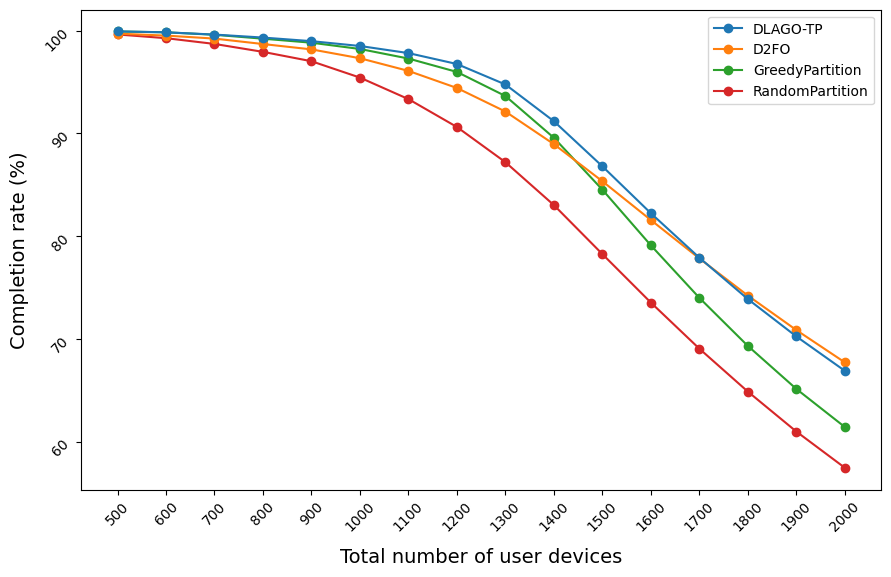

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_rate_df = pd.read_csv(f"{vec_directory}/completion_rate.csv", index_col=0)
index = completion_rate_df.index
columns = completion_rate_df.columns
completion_rate_df = completion_rate_df.apply(pd.to_numeric, errors='coerce')
completion_rate_df.index = index
completion_rate_df.columns = columns

completion_rate_df = completion_rate_df.mul(100)
completion_rate_df = completion_rate_df.round(2)
display(completion_rate_df)


fig1 = plt.figure(figsize=(10,6))

columns = completion_rate_df.columns
x_values = range(len(columns))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.tick_params(labelrotation=45)

p0 = ax1.plot(x_values, completion_rate_df.iloc[0], marker='o', zorder=7)  
p1 = ax1.plot(x_values, completion_rate_df.iloc[1], marker='o', zorder=6)
p2 = ax1.plot(x_values, completion_rate_df.iloc[2], marker='o', zorder=5)
p3 = ax1.plot(x_values, completion_rate_df.iloc[3], marker='o', zorder=4)

ax1.legend(handles=[p0[0], p1[0], p2[0], p3[0]], 
           labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[1].name, completion_rate_df.iloc[2].name, completion_rate_df.iloc[3].name])

plt.ylabel('Completion rate (%)', labelpad=10, fontsize=14)
plt.xlabel('Total number of user devices', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
plt.show()
fig1.savefig(f'{vec_directory}/completion_rate_graph.svg', format="svg", bbox_inches = "tight")


,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
DLAGO-TP,56.29,58.55,60.98,64.48,68.23,73.26,79.62,86.64,93.61,100.19,105.30,109.33,112.51,115.26,117.48,119.64
D2FO,92.70,94.61,96.66,98.90,101.21,104.02,107.45,110.95,114.43,118.31,121.85,125.32,128.51,131.38,133.83,136.25
GreedyPartition,98.69,101.19,103.75,106.51,109.19,112.56,116.64,120.95,125.63,130.86,135.70,140.01,143.54,146.71,149.46,151.87
RandomPartition,100.39,103.87,106.77,109.87,113.02,116.57,120.23,123.93,127.53,131.28,134.92,138.50,141.78,144.64,147.36,150.04


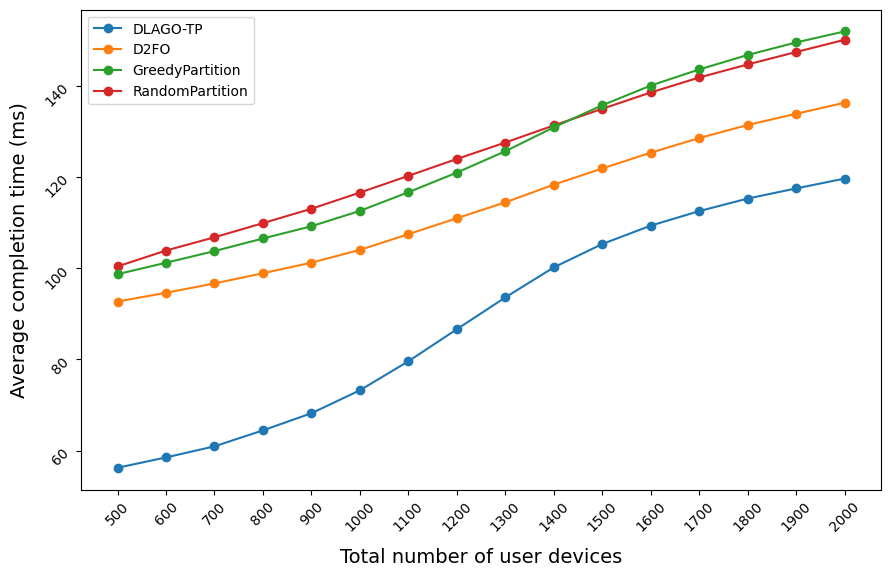

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_time_df = pd.read_csv(f"{vec_directory}/completion_time.csv", index_col=0)
index = completion_time_df.index
columns = completion_time_df.columns
completion_time_df = completion_time_df.apply(pd.to_numeric, errors='coerce')
completion_time_df.index = index
completion_time_df.columns = columns

completion_time_df = completion_time_df.mul(1000)
completion_time_df = completion_time_df.round(2)
display(completion_time_df)

fig2 = plt.figure(figsize=(10,6))

columns = completion_time_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
p0 = ax2.plot(x_values, completion_time_df.iloc[0], marker='o', zorder=7)
p1 = ax2.plot(x_values, completion_time_df.iloc[1], marker='o', zorder=6)
p2 = ax2.plot(x_values, completion_time_df.iloc[2], marker='o', zorder=5)
p3 = ax2.plot(x_values, completion_time_df.iloc[3], marker='o', zorder=4)

ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0]], 
           labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[1].name, completion_time_df.iloc[2].name, completion_time_df.iloc[3].name])

plt.ylabel('Average completion time (ms)', labelpad=10, fontsize=14)
plt.xlabel('Total number of user devices', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
plt.show()
fig2.savefig(f'{vec_directory}/completion_time_graph.svg', format="svg", bbox_inches = "tight")


,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
DLAGO-TP,47854.149497,56840.652610,65538.255432,73649.731591,81329.676777,88096.582119,93684.239775,98104.588173,101052.412508,102003.284949,102121.978085,101853.744043,101622.877401,101319.439471,101171.039159,100913.859916
D2FO,40584.380667,48194.021725,55544.732123,62529.361071,69236.781673,75292.278309,80504.166599,84964.926941,88534.598984,90656.130212,92014.110428,92693.922307,93025.822872,93113.331395,93219.694630,93166.001242
GreedyPartition,39591.152923,46923.462675,53959.435556,60654.697361,67087.700795,72867.105954,77805.348781,81958.535552,84713.619987,85313.073871,84671.461942,83338.068736,82034.945052,80725.569885,79598.844978,78653.086908
RandomPartition,39220.796511,46147.946073,52780.663324,58990.146867,64854.625003,69692.269581,73764.379456,76882.779510,78939.895864,79843.117483,79636.656092,78945.364684,78003.690789,76988.304920,75889.625899,74758.393300


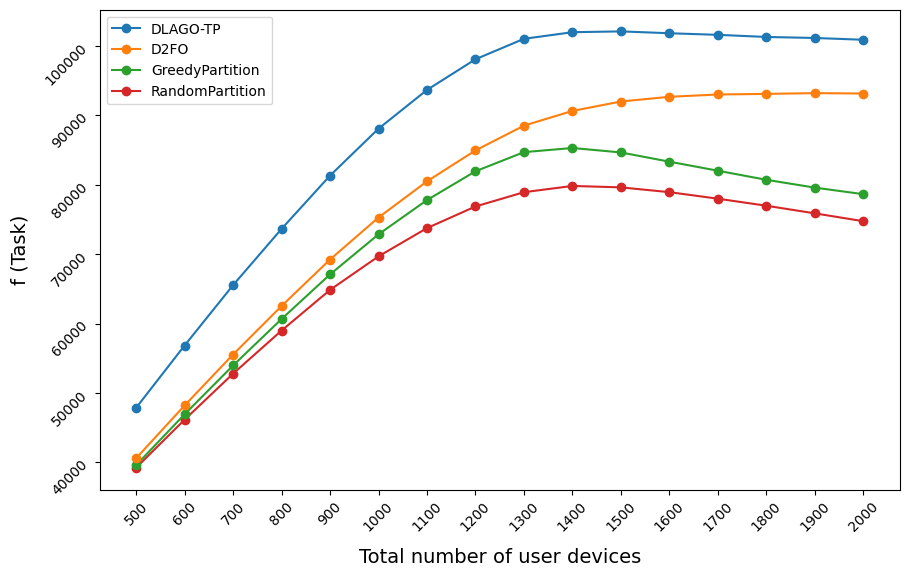

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

myMatrix_df = pd.read_csv(f"{vec_directory}/myMatrix.csv", index_col=0)
index = myMatrix_df.index
columns = myMatrix_df.columns
myMatrix_df = myMatrix_df.apply(pd.to_numeric, errors='coerce')
myMatrix_df.index = index
myMatrix_df.columns = columns

display(myMatrix_df)



fig2 = plt.figure(figsize=(10,6))

columns = myMatrix_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
p0 = ax2.plot(x_values, myMatrix_df.iloc[0], marker='o', zorder=7)
p1 = ax2.plot(x_values, myMatrix_df.iloc[1], marker='o', zorder=6)
p2 = ax2.plot(x_values, myMatrix_df.iloc[2], marker='o', zorder=5)
p3 = ax2.plot(x_values, myMatrix_df.iloc[3], marker='o', zorder=4)

ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0]], 
           labels=[myMatrix_df.iloc[0].name, myMatrix_df.iloc[1].name, myMatrix_df.iloc[2].name, myMatrix_df.iloc[3].name])


plt.ylabel('f (Task)', labelpad=10, fontsize=14)
plt.xlabel('Total number of user devices', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
plt.show()
fig2.savefig(f'{vec_directory}/matrix_graph.svg', format="svg", bbox_inches = "tight")

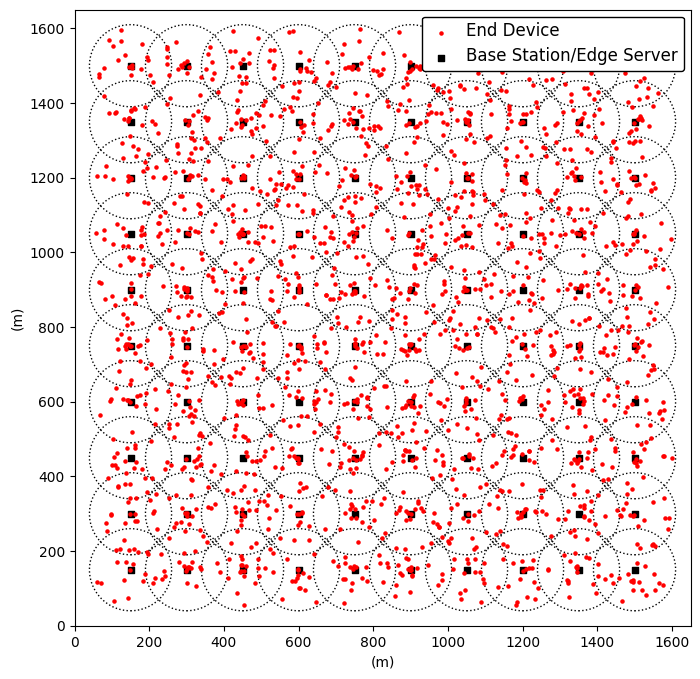

In [10]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y



# Generate coordinates for each base station
num_rows = 10
num_columns = 10
distance = 150
base_station_x_coords = []
base_station_y_coords = []
for x in range(distance, (num_rows + 1) * distance, distance):
    for y in range(distance, (num_columns + 1) * distance, distance):
        base_station_x_coords.append(x)
        base_station_y_coords.append(y)


# Generate random coordinates for users
num_users = 2000  # Number of users
num_users_per_region = num_users // (num_rows * num_columns)
user_x_coords = []
user_y_coords = []
for base_station_x, base_station_y in zip(base_station_x_coords, base_station_y_coords):
    for i in range(num_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# create figure
plt.figure(figsize=(10, 8))


# plot base station
base_station_scatter = plt.scatter(base_station_x_coords, base_station_y_coords, color='black', marker='s', s=20, label='Base Station/Edge Server')
for x, y in zip(base_station_x_coords, base_station_y_coords):
    circle = plt.Circle((x, y), 110, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)


# Plot the users
end_device_scatter = plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5, label='End Device')

# Set labels and title
# plt.title('Base Stations Grid with Users')
plt.xlabel('(m)')
plt.ylabel('(m)')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

legend = plt.legend(handles=[end_device_scatter, base_station_scatter], loc='upper right', fancybox=True, framealpha=1, edgecolor='black')
plt.setp(legend.get_texts(), fontsize='large')

plt.savefig(f'{vec_directory}/environment_uniform.svg', format='svg', bbox_inches = "tight")

# Show the graph
plt.show()

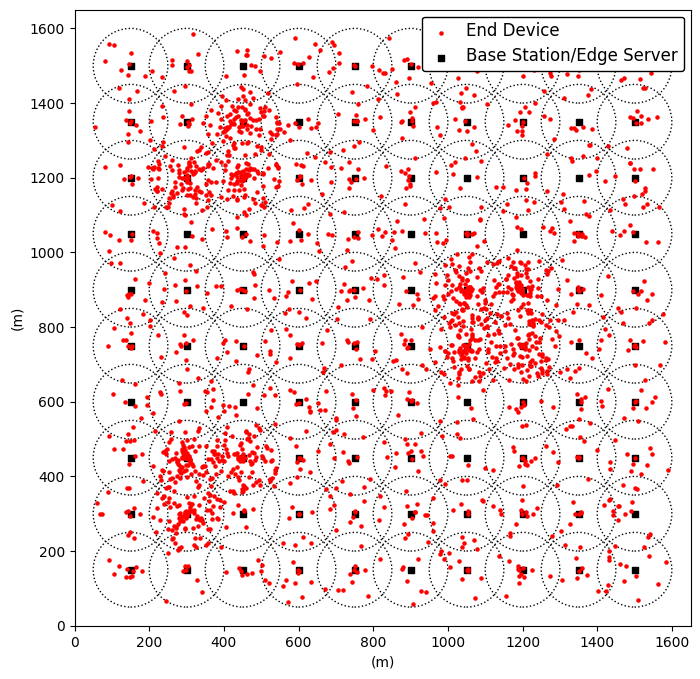

In [11]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y


# Generate coordinates for each base station
num_rows = 10
num_columns = 10
distance = 150
base_station_x_coords = []
base_station_y_coords = []
for y in range(distance, (num_columns + 1) * distance, distance):
    for x in range(distance, (num_rows + 1) * distance, distance):
        base_station_x_coords.append(x)
        base_station_y_coords.append(y)


# Generate random coordinates for users
user_x_coords = []
user_y_coords = []
num_users = 2000
hotspot_percent = 0.4
hotspot_idx = [11, 21, 22, 71, 72, 82, 46, 47, 56, 57]
hotspot_users_per_region = math.floor(num_users * hotspot_percent / len(hotspot_idx))
for idx in hotspot_idx:
    for i in range(hotspot_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x_coords[idx], base_station_y_coords[idx], 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


users_per_region = math.floor(num_users * (1 - hotspot_percent) / (num_rows * num_columns))
for base_station_x, base_station_y in zip(base_station_x_coords, base_station_y_coords):
    for i in range(users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)



# create figure
plt.figure(figsize=(10, 8))

# Plot the base stations
base_station_scatter = plt.scatter(base_station_x_coords, base_station_y_coords, color='black', marker='s', s=20, label='Base Station/Edge Server')
for x, y in zip(base_station_x_coords, base_station_y_coords):
    circle = plt.Circle((x, y), 100, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)


# Set labels and title
# plt.title('Base Stations Grid with Users')
plt.xlabel('(m)')
plt.ylabel('(m)')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

legend = plt.legend(handles=[end_device_scatter, base_station_scatter], loc='upper right', fancybox=True, framealpha=1, edgecolor='black')
plt.setp(legend.get_texts(), fontsize='large')

plt.savefig(f'{vec_directory}/environment_hotspot.svg', format='svg', bbox_inches = "tight")


# Show the graph

plt.show()